In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
spamData = pd.read_csv('emails.csv')

In [3]:
spamData

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spamData.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
spamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
ham = spamData[ spamData['spam'] == 0 ] #legitimate emails

In [9]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam = spamData[ spamData['spam'] == 1 ] #spam emails

In [11]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [12]:
print('Spam Percentage = ', (len(spam)/len(spamData)) * 100, '%')

Spam Percentage =  23.88268156424581 %


In [13]:
print('Ham Percentage = ', (len(ham)/len(spamData)) * 100, '%')

Ham Percentage =  76.11731843575419 %


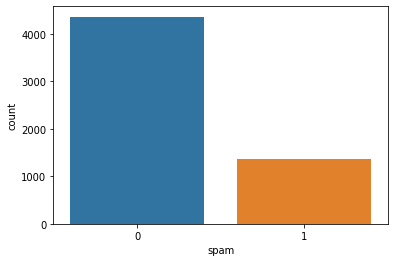

In [16]:
sns.countplot(spamData['spam'])

COUNTVECTORIZER

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

In [23]:
vector = vectorizer.fit_transform(spamData['text'])

In [26]:
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
vector.shape

(5728, 37303)

TRAINING

In [31]:
label = spamData['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
classifier = MultinomialNB()
classifier.fit(vector, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
testSample = ['Free Money!!', 'Hi Aditi, Let me know if you need more information.']
testVector = vectorizer.transform(testSample)

In [36]:
testPredictions = classifier.predict(testVector)

In [37]:
testPredictions

array([1, 0])

In [38]:
X = vector
y = label

In [41]:
X.shape

(5728, 37303)

In [42]:
y.shape

(5728,)

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

In [53]:
classifier.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Evaluating Model

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
yTrainPredict = classifier.predict(Xtrain)
yTrainPredict

array([1, 0, 0, ..., 1, 1, 1])

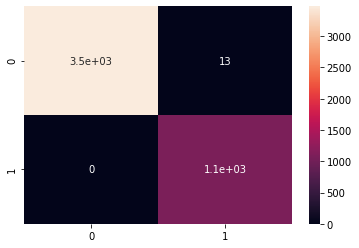

In [56]:
cm_training = confusion_matrix(ytrain, yTrainPredict)
sns.heatmap(cm_training, annot = True)

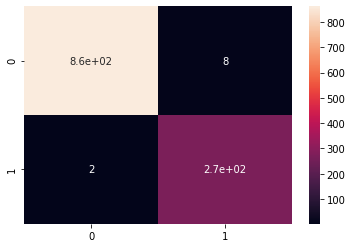

In [59]:
yTestPredict = classifier.predict(xtest)

cm_testing = confusion_matrix(ytest, yTestPredict)
sns.heatmap(cm_testing, annot = True)

In [60]:
print(classification_report(ytest, yTestPredict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      0.99      0.98       276

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

